In [1]:
import pandas as pd

# List of districts
districts = ['amritsar', 'barnala', 'bathinda', 'faridkot', 'fatehgarhsahib', 'fazilka', 'ferozepur', 'gurdaspur', 'hoshiarpur', 'jalandhar', 'kapurthala', 'ludhiana', 'mansa', 'moga', 'pathankot', 'patiala', 'rupnagar', 'sahibzadaajitsinghnagar(mohali)', 'nawanshahr', 'sangrur', 'shrmukatsarsahib', 'tarntaran']

# Initialize an empty list to store all weather dataframes
weather_dfs = []

# Loop through each district
for district in districts:
    # Load weather data for the current district
    district_weather_data = pd.read_csv(f'./Weather/{district}/{district}_average_weather.csv')
    
    # Add the district column to the dataframe
    district_weather_data.insert(0, 'District', district)
    
    # Append the dataframe to the list
    weather_dfs.append(district_weather_data)

# Concatenate all weather dataframes into a single dataframe
all_weather_data = pd.concat(weather_dfs)

# Save the concatenated dataframe to a CSV file
all_weather_data.to_csv('all_districts_weather_data.csv', index=False)


In [2]:
import pandas as pd

# Load merged weather data
merged_weather_data = pd.read_csv('all_districts_weather_data.csv')

# Load cases data
cases_data = pd.read_csv('modified_file.csv')

# Reshape cases data to have 'Year' as a single column
cases_data = cases_data.melt(id_vars=['District', 'Month'], var_name='Year', value_name='Cases')

# Merge cases data with merged weather data based on District, Month, and Year
# Convert 'Year' column in cases_data to int64
cases_data['Year'] = cases_data['Year'].astype(int)

# Merge cases data with merged weather data based on District, Month, and Year
final_merged_data = pd.merge(merged_weather_data, cases_data, on=['District', 'Month', 'Year'])

# Save the final merged data to a CSV file
final_merged_data.to_csv('final_merged_data.csv', index=False)




In [3]:
print(final_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       1008 non-null   object 
 1   Year                           1008 non-null   int64  
 2   Month                          1008 non-null   int64  
 3   Avg_Temp                       1008 non-null   float64
 4   Avg_Feelslike                  1008 non-null   float64
 5   Avg_Dew                        1008 non-null   float64
 6   Avg_Humidity                   1008 non-null   float64
 7   Avg_Precipitation              1008 non-null   float64
 8   Avg_Precipitation_Probability  1008 non-null   float64
 9   Avg_Precipitation_Coverage     1008 non-null   float64
 10  Avg_Snowfall                   1008 non-null   float64
 11  Avg_Snow_Depth                 1008 non-null   float64
 12  Avg_Wind_Gust                  1008 non-null   f

Mean Squared Error (MSE): 39.7093253968254
R-squared (R2) Score: 0.10507429937399027
MAE Score: 3.1121031746031744


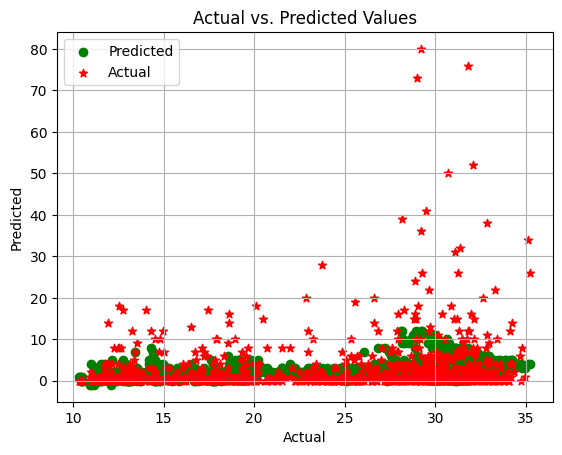

0       0
1       1
2       0
3       0
4       0
       ..
1003    0
1004    0
1005    0
1006    0
1007    0
Name: Cases, Length: 1008, dtype: int64
[ 0.  1.  1. ...  1. -0.  0.]


In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
# Assuming your dataset is stored in a CSV file named 'data.csv'
data = pd.read_csv('final_merged_data.csv')

# Explore your data to understand its structure
# print(data.head())  # View the first few rows
# print(data.info())  # Summary of the dataset

# Split the data into independent variables (X) and dependent variable (y)
X = data.drop(['Cases','District','Year','Month','Avg_Visibility','Avg_Snowfall', 'Avg_Snow_Depth', 'Avg_Solar_Radiation', 'Avg_Solar_Energy', 'Avg_UV_Index'], axis=1)  # Drop the target variable column
y = data['Cases']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train = X
y_train = y
X_test = X
y_test = y
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)


y_pred_r = np.round(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)
mae = mean_absolute_error(y_test,y_pred_r)



print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("MAE Score:", mae)


# Plot the predicted vs actual valuesplt.figure(figsize=(10, 6))
plt.scatter(data["Avg_Temp"], y_pred_r, color='green', label='Predicted', marker='o')
plt.scatter(data["Avg_Temp"], y_test, color='red', label='Actual', marker='*')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

print(y_test)
print((y_pred_r))
